In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import keras

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

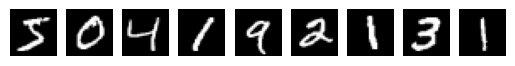

In [5]:
fig, ax = plt.subplots(1, 9)
for ax, digit in zip(ax, train_images[:9]):
    ax.imshow(digit.reshape(28, 28), cmap='gray')
    ax.axis('off')

In [6]:
from keras import layers

keras listar själv ut dimensionerna när man använder Sequential. Men vi börjar alltså på 784 noder (28*28)

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

använd argmax() för att få svaret från softmax närmst 1 (mellan 0-1)

In [8]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8749 - loss: 0.4369
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.1133
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9792 - loss: 0.0712
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0497
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0381


In [11]:
test_digits = test_images[:10]
predictions = model.predict(test_digits)
predictions[0].argmax(), test_labels[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


(np.int64(7), np.uint8(7))

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test_acc:', test_acc, "\ntest_loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.0785
test_acc: 0.9779999852180481 
test_loss: 0.06697981804609299
